In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [175]:
#reading the prepared dataset for the machine learning model
df = pd.read_csv('Group_17_data_cleaned.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [136]:
df = df.dropna(axis=0)
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [137]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_tCO2',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Dummy_Weekend', 'Dummy_Monday', 'Dummy_Saturday', 'Dummy_Sunday',
       'Dummy_Thursday', 'Dummy_Tuesday', 'Dummy_Wednesday',
       'Dummy_Maximum_Load', 'Dummy_Medium_Load'],
      dtype='object')

In [176]:
df["date"]= pd.to_datetime(df["date"])

In [139]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [177]:
df = df.rename(columns = {'CO2(tCO2)' : 'CO2_tCO2','Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh'})

In [141]:
df = df.head(10000)
df

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-04-15 03:00:00,3.20,3.85,0.0,0.0,63.92,100.0,10800,1,0,0,1,0,0,0,0,0
9996,2018-04-15 03:15:00,3.13,3.92,0.0,0.0,62.40,100.0,11700,1,0,0,1,0,0,0,0,0
9997,2018-04-15 03:30:00,3.13,3.96,0.0,0.0,62.01,100.0,12600,1,0,0,1,0,0,0,0,0
9998,2018-04-15 03:45:00,3.13,4.00,0.0,0.0,61.63,100.0,13500,1,0,0,1,0,0,0,0,0


# considering Usage_kWh as target varible

In [142]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_tCO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Dummy_Weekend,Dummy_Monday,Dummy_Saturday,Dummy_Sunday,Dummy_Thursday,Dummy_Tuesday,Dummy_Wednesday,Dummy_Maximum_Load,Dummy_Medium_Load
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [178]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# convert date/time strings to timestamps
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9  # convert to seconds

# extract feature matrix X and target vector y
X = df.drop('Usage_kWh', axis=1)
y = df['Usage_kWh']

# scale the feature matrix
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X 


scaled_y = scaler.fit_transform(y.values.reshape(-1, 1))

# check the shape and range of the scaled target variable
print(scaled_X.shape)
print(scaled_y.shape)




(35040, 16)
(35040, 1)


In [144]:
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.34,random_state=42)

In [145]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=42)

In [146]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3400, 16)
(3400, 1)
(3300, 16)
(3300, 1)
(3300, 16)
(3300, 1)


(None, None)

# SVM with Linear Kernel

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [148]:
model = SVR(kernel="linear")
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [149]:
#Evalution on Train Dataset
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print("Model Score:",model.score(X_train, y_train))
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

Model Score: 0.9133755665802464
The mean squared error is 0.005145809869790437
The mean absolute error is 0.05993906044979443
The root mean sqaured error is 0.07173430051091624


In [150]:
#Evalution on test Dataset
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print("MSE:", mse)
print("Model Score:",model.score(X_test, y_test))
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

MSE: 0.005151175463430889
Model Score: 0.9160269348725301
The mean squared error is 0.005145809869790437
The mean absolute error is 0.058603669238002844
The root mean sqaured error is 0.07173430051091624


In [151]:
##Evalution on Validation dataset polu
y_valid_pred = model.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The measn squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")



The measn squared error is 0.00531186098152029
The mean absolute error is 0.06049111169890561
The root mean sqaured error is 0.07288251492313016


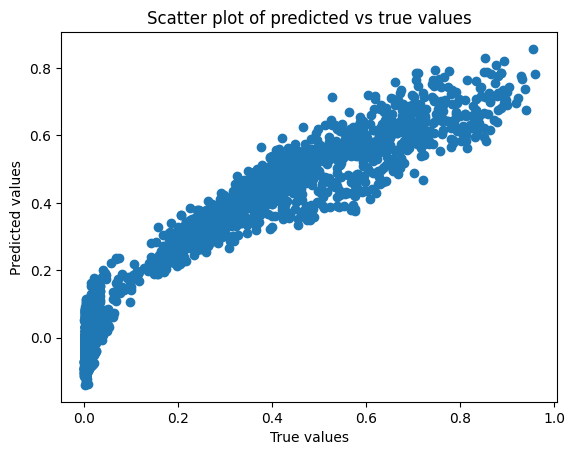

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# scatter plot of predicted vs true values
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of predicted vs true values")
plt.show()

# with different hyperparamters

In [153]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_valid,y_valid)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.908 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.925 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.918 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.908 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.2s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.912 total time=   0.2s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.918 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.908 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.927 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.925 total time=   0.2s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.912 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.918 total time=   0.4s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.908 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.927 total time=   0.2s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.925 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.912 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.918 total time=   0.3s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.908 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.927 total time=   0.2s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.925 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.912 total time=   0.2s
[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.918 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.908 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.926 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.925 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.911 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.918 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.908 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.926 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.925 total time=   0.3s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.911 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.918 total time=   0.1s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.908 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.926 total time=   0.2s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.925 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.911 total time=   0.2s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.918 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.908 total time=   0.2s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.926 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.925 total time=   0.2s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.911 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.918 total time=   0.1s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.908 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.926 total time=   0.2s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.925 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.911 total time=   0.2s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.918 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.909 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.911 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.917 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.909 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.911 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.917 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.909 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.925 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.925 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.911 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.917 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.909 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.911 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.917 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.909 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.925 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.911 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.917 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.908 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.925 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.925 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.911 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.918 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.908 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.925 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.925 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.911 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.918 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.908 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.925 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.925 total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.911 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.918 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.908 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.925 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.925 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.911 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.918 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.908 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.925 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.925 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.911 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.918 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.908 total time=  19.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.926 total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.925 total time=  22.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.911 total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.917 total time=  21.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.908 total time=  19.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.926 total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.925 total time=  22.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.911 total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.917 total time=  21.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.908 total time=  18.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.926 total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.925 total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.911 total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.917 total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.908 total time=  18.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.926 total time=  22.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.925 total time=  22.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.911 total time=  20.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.917 total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.908 total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.926 total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.925 total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.911 total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.917 total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [154]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [155]:

best_model_linear = SVR(kernel="linear",C=1000,gamma=1)
best_model_linear.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=1, kernel='linear')

In [ ]:
# best model 
best_model_linear = SVR(kernel="linear",C=1,gamma=1)
best_model_linear.fit(X_train,y_train)
filename = 'svm_lin_co.sav'
pickle.dump(best_model_linear, open(filename, 'wb'))

In [156]:
# best model on validation data
y_valid_pred = best_model_linear.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The measn squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")



The measn squared error is 0.005327262435153333
The mean absolute error is 0.06068703256638911
The root mean sqaured error is 0.07298809790063948
The regression score is 0.917128303449912


In [157]:
# best model on test data
y_test_pred = best_model_linear.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")



The mean squared error is 0.005169085129802065
The mean absolute error is 0.05882451064748392
The root mean sqaured error is 0.07189634990597273
The regression score is 0.916750183021498


## Non_Linear kernel - polynomial

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [159]:
model = SVR(kernel='poly')
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [160]:
#Evalution on Train Dataset
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print("Model Score:",model.score(X_train, y_train))
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

Model Score: 0.9694899916132942
The mean squared error is 0.0018124066858011723
The mean absolute error is 0.03335386564492973
The root mean sqaured error is 0.042572369981023754


In [161]:
#Evalution on test Dataset
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print("MSE:", mse)
print("Model Score:",model.score(X_test, y_test))
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

MSE: 0.0019058777536659806
Model Score: 0.9689308978368609
The mean squared error is 0.0018124066858011723
The mean absolute error is 0.033674262235855845
The root mean sqaured error is 0.042572369981023754


In [162]:
##Evalution on Validation dataset 

y_valid_pred = model.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The measn squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")



The measn squared error is 0.0018290049686467268
The mean absolute error is 0.033173624341975724
The root mean sqaured error is 0.04276686765063262


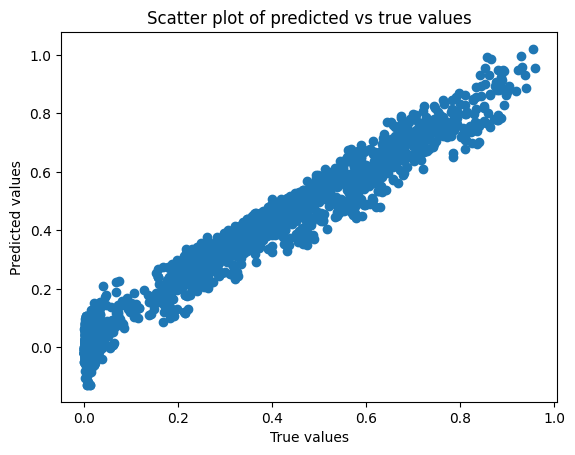

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# scatter plot of predicted vs true values
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of predicted vs true values")
plt.show()

HyperParameter Tunning 

In [164]:
# finding best model using grid search

In [165]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C' :[0.1,1,5,10],
              'degree': [1],
              'kernel': ['poly']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_valid,y_valid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.908 total time=   0.1s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.927 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.926 total time=   0.1s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.912 total time=   0.1s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.918 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, degree=1, kernel=poly;, score=0.908 total time=   0.1s
[CV 2/5] END ........C=1, degree=1, kernel=poly;, score=0.926 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, degree=1, kernel=poly;, score=0.925 total time=   0.1s
[CV 4/5] END ........C=1, degree=1, kernel=poly;, score=0.911 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, degree=1, kernel=poly;, score=0.918 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=5, degree=1, kernel=poly;, score=0.908 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=5, degree=1, kernel=poly;, score=0.925 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=5, degree=1, kernel=poly;, score=0.925 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=5, degree=1, kernel=poly;, score=0.911 total time=   0.2s
[CV 5/5] END ........C=5, degree=1, kernel=poly;, score=0.918 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, degree=1, kernel=poly;, score=0.909 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, degree=1, kernel=poly;, score=0.925 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, degree=1, kernel=poly;, score=0.925 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, degree=1, kernel=poly;, score=0.911 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, degree=1, kernel=poly;, score=0.918 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 5, 10], 'degree': [1],
                         'kernel': ['poly']},
             verbose=3)

In [166]:
grid.best_params_

{'C': 0.1, 'degree': 1, 'kernel': 'poly'}

In [167]:
# Non Linear on validation data
best_non = SVR(kernel="poly",degree=1,C=0.1)
best_non.fit(X_train,y_train)
y_valid_pred = best_non.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The measn squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The measn squared error is 0.005312902571850164
The mean absolute error is 0.060496777304465996
The root mean sqaured error is 0.07288966025335943
The regression score is 0.9174058059659145


In [168]:
# Non Linear on test data
y_test_pred = best_non.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")




The mean squared error is 0.005151344108126079
The mean absolute error is 0.058607300199076486
The root mean sqaured error is 0.0717728647061414
The regression score is 0.917110900271159


# Deep Learning model

In [179]:
from keras.models import Sequential
from keras.layers import Dense

In [180]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size = 0.2, random_state = 1111)

In [181]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs =100)

Model: "sequential_163"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_326 (Dense)           (None, 128)               2176      
                                                                 
 dense_327 (Dense)           (None, 64)                8256      
                                                                 
 dense_328 (Dense)           (None, 1)                 65        
                                                                 
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
701/701 [==============================] - 3s 3ms/step - loss: 0.0035 - mae: 0.0311 - val_loss: 7.6023e-04 - val_mae: 0.0177
Epoch 2/100
701/701 [==============================] - 2s 2ms/step - loss: 5.8358e-04 - mae: 0.0161 - val_loss: 5.2164e-04 - val_mae: 0.0159
Epoch 3/100
701/701 [=============

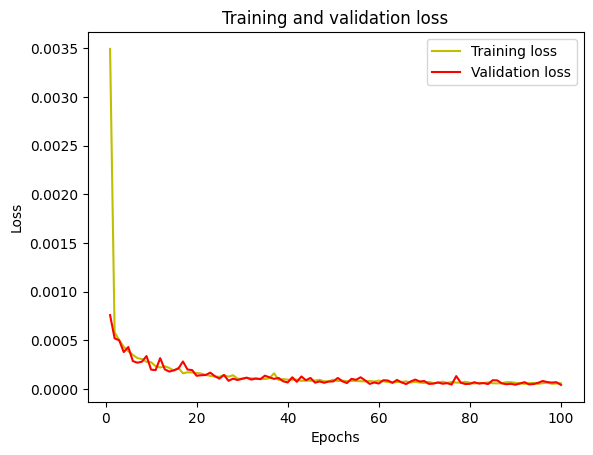

In [182]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

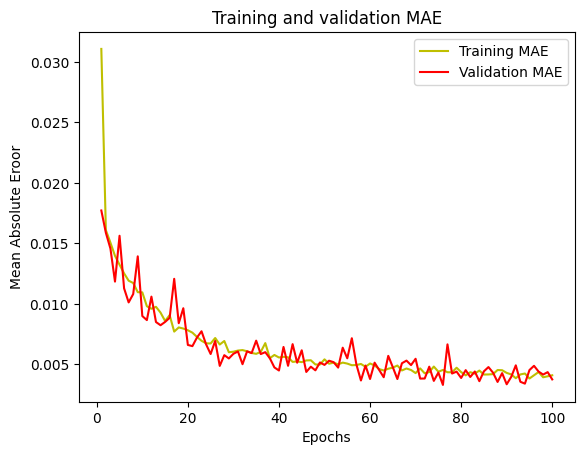

In [183]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Eroor')
plt.legend()
plt.show()

In [184]:
#Predict on test data
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 77ms/step
Predicted values are:  [[0.05287464]
 [0.5207053 ]
 [0.02324202]
 [0.01851977]
 [0.5222871 ]]
Real values are:  [[0.04968826]
 [0.55999491]
 [0.02334903]
 [0.01806846]
 [0.52290368]]


In [185]:
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

876/876 [==============================] - 1s 1ms/step
The mean squared error is 3.870760692090221e-05
The mean absolute error is 0.0036398316274563786
The root mean sqaured error is 0.006221543773124337


In [186]:
# We decalred a function for creating a model.
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
def build_model3_five_hidden_layers():
    
    model = Sequential()

    model.add(Dense(32, input_shape = (X_train.shape[1],)))    
    
    model.add(Dense(64,Activation('relu')))                         
    
    model.add(Dense(64, Activation('relu')))                         
    
    
    model.add(Dense(64, Activation('relu')))                         
    
    
    model.add(Dense(64, Activation('relu')))                         
    
    
    model.add(Dense(64, Activation('relu')))                         

    
    model.add(Dense(1))                        
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) 
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()
history = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Here is a summary of this model: 
Model: "sequential_164"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_329 (Dense)           (None, 32)                544       
                                                                 
 dense_330 (Dense)           (None, 64)                2112      
                                                                 
 dense_331 (Dense)           (None, 64)                4160      
                                                                 
 dense_332 (Dense)           (None, 64)                4160      
                                                                 
 dense_333 (Dense)           (None, 64)                4160      
                                                                 
 dense_334 (Dense)           (None, 64)                4160      
                                                                 
 dense_335 (Dense)

In [189]:
y_train_pred = model3.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

876/876 [==============================] - 2s 2ms/step
The mean squared error is 5.7028070012502005e-05
The mean absolute error is 0.004168386019726898
The root mean sqaured error is 0.007551693188451316


In [191]:
y_test_pred = model3.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The R2 score is {r2_score}")

219/219 [==============================] - 0s 2ms/step
The mean squared error is 6.811906263839141e-05
The mean absolute error is 0.004409648473830623
The root mean sqaured error is 0.008253427326777125
The R2 score is 0.9174058059659145


In [40]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
95,0.000321,0.010973,0.000321,1206.517700,0.000721,0.017429,0.000721,4938.671875,95
96,0.000308,0.010572,0.000308,1012.146118,0.000247,0.009276,0.000247,1469.281250,96
97,0.000311,0.010750,0.000311,915.653259,0.000248,0.009352,0.000248,3466.210938,97
98,0.000307,0.010525,0.000307,1007.065308,0.000306,0.010989,0.000306,3930.220215,98
99,0.000302,0.010377,0.000302,1038.085449,0.000511,0.013476,0.000511,109.908913,99


In [41]:
train_predictions = model3.predict(X_train)
train_predictions.shape

250/250 [==============================] - 0s 2ms/step


(8000, 1)

In [42]:
y_train.shape

(8000, 1)

250/250 [==============================] - 0s 2ms/step


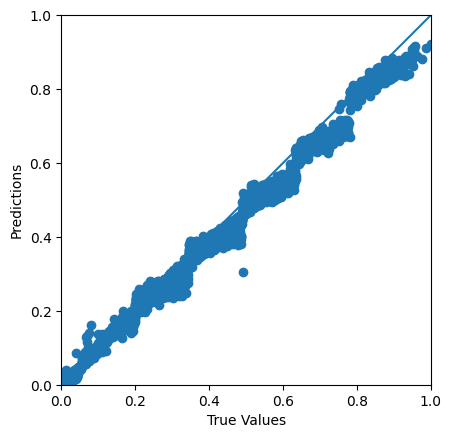

In [43]:
train_predictions = model3.predict(X_train)

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

63/63 [==============================] - 0s 2ms/step


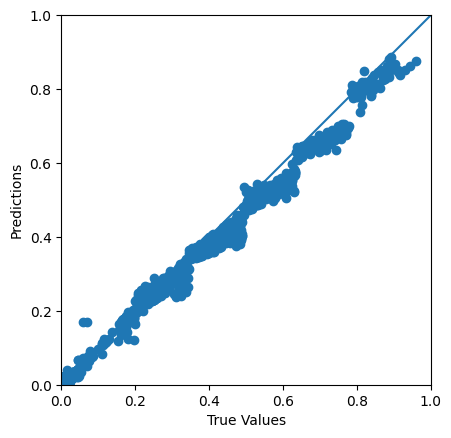

In [44]:
test_predictions = model3.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Hyperparameters Tuning

In [173]:
!pip install keras-tuner

import kerastuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Finding right optimizer

In [48]:
def build_model(hp):
    
    model = Sequential()
    
    model.add(Dense(32,activation='relu',input_dim=16))
    model.add(Dense(1,activation='sigmoid'))
    
    optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    
    model.compile(optimizer=optimizer,loss='mse', metrics='mse')
                        
    return model
    

In [49]:
tuner = kt.RandomSearch(
    build_model,
    objective='loss',
    max_trials=5,
    overwrite=True)

In [50]:
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=1111)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=1111)

In [51]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Trial 4 Complete [00h 00m 04s]
loss: 0.12818722426891327

Best loss So Far: 0.00357743795029819
Total elapsed time: 00h 00m 32s


In [52]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [53]:
model = tuner.get_best_models(num_models=1)[0]

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_valid,y_valid))

Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 11/100
250/250 [==============================] - 1s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 12/100
250/250 [==============================] - 1s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 13/100
250/250 [==============================] - 1s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 14/100
250/250 [==============================] - 0s 2ms/st

In [56]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

32/32 [==============================] - 0s 4ms/step
The mean squared error is 0.0003765485217430384
The mean absolute error is 0.012758638880782868
The root mean sqaured error is 0.019404858199508657


# Finding right number of neurons

In [57]:
def build_model(hp):
    
    model = Sequential()
    
    units=hp.Int('units',min_value=8,max_value=128,step=8)
    
    model.add(Dense(units=units,activation='relu',input_dim=16))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='mse', metrics=['mse'])
    
    return model

In [58]:
tuner = kt.RandomSearch(
    build_model,
    objective='loss',
    max_trials=5,
    overwrite=True)

In [59]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 04s]
loss: 0.0025803549215197563

Best loss So Far: 0.0018964597256854177
Total elapsed time: 00h 00m 28s


In [60]:
tuner.get_best_hyperparameters()[0].values

{'units': 88}

In [61]:
model = tuner.get_best_models(num_models=1)[0]

In [62]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_valid,y_valid))

Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 9.5216e-04 - val_mse: 9.5216e-04
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 8.2210e-04 - mse: 8.2210e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 7.0622e-04 - mse: 7.0622e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 11/100
250/250 [==============================] - 1s 2ms/step - loss: 6.5836e-04 - mse: 6.5836e-04 - val_loss: 7.5295e-04 - val_mse: 7.5295e-04
Epoch 12/100
250/250 [==============================] - 1s 2ms/step - loss: 6.0767e-04 - mse: 6.0767e-04 - val_loss: 6.7780e-04 - val_mse: 6.7780e-04
Epoch 13/100
250/250 [==============================] - 1s 2ms/step - loss: 5.6718e-04 - mse: 5.6718e-04 - val_loss: 6.2548e-04 - val_mse: 6.25

In [63]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

32/32 [==============================] - 0s 2ms/step
The mean squared error is 0.0003666438567525024
The mean absolute error is 0.012910190635434542
The root mean sqaured error is 0.019147946541404965


# Comparision Table

In [192]:
from prettytable import PrettyTable

# create table
table = PrettyTable()
table.field_names = ["Model", "MSE", "MAE", "RMSE", "Score"]

# add rows

table.add_row(["SVC Non Linear", "0.005151", "0.05861", "0.07177", "0.9171"])
table.add_row(["SVC Linear", "0.001812", "0.03367", "0.04257", "0.9689"])
table.add_row(["Deep Learning", " 0.000068119", "0.0044", "0.00825", "0.9174058"])
# print table
print(table)


+----------------+--------------+---------+---------+-----------+
|     Model      |     MSE      |   MAE   |   RMSE  |   Score   |
+----------------+--------------+---------+---------+-----------+
| SVC Non Linear |   0.005151   | 0.05861 | 0.07177 |   0.9171  |
|   SVC Linear   |   0.001812   | 0.03367 | 0.04257 |   0.9689  |
| Deep Learning  |  0.000068119 |  0.0044 | 0.00825 | 0.9174058 |
+----------------+--------------+---------+---------+-----------+


# Observation

# It appears that the SVC with a linear kernel performed the best, with the lowest mean squared error, mean absolute error, and root mean squared error, as well as the highest regression score. Therefore, the SVC with a linear kernel is likely the best model to use.